# Histogram Equilization and Histogram Specification

In [38]:
import cv2
import matplotlib.pyplot as plt

def load_image(number):
  img = cv2.imread(f"/content/original_images/img{number}.bmp")
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return gray

def show_image(image):
  plt.figure(figsize=(12,5))
  plt.imshow(image,cmap='gray')
  plt.axis('off')
  plt.show()

def calculate_hist(gray):
  fig,ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].imshow(gray,cmap="gray")
  ax[0].axis('off')
  ax[0].set_title("Image")

  ax[1].hist(gray.ravel(), bins=32, range=(0.0, 256.0), ec='k') #calculating histogram
  ax[1].set_title("Histogram")
  ax[1].set_xlabel("range")
  plt.show()

def compare_matched_hist(src,dst,matched_src):
  images = [src,dst,matched_src]
  headings = ["Source","Destination","Matched Source"]
  n,m = len(images),2
  fig,ax = plt.subplots(n,m,figsize=(15,10))

  for i, (heading,img) in enumerate(zip(headings,images)):
    ax[i,0].imshow(img,cmap="gray")
    ax[i,0].axis('off')
    ax[i,0].set_title(heading)

    ax[i,1].hist(img.ravel(), bins=32, range=(0.0, 256.0), ec='k') #calculating histogram
  plt.show()

## Histograms
A histogram is a plot that shows the underlying frequency distribution of numerical data. 
The data used here is a numerical range and is divided into series of consecutive 
and non overlapping intervals. Each interval corresponds to a vertical bar. The area of vertical
bar for an interval is directly proportional to the number count of values from original data 
that fell in that interval. If the length of each interval is same then infomation about frequency 
can be obtained from the  height of the bar.
An image histogram is a type of histogram that acts as a graphical representation of the tonal 
distribution in a digital image. It plots the number of pixels for each tonal value.

### Applications of Histograms
Histograms has wide application in image processing such as improving 
brightness of image, contrast of image, equalising an image and thresholding an image.
In field of statistics, we can use it identify most common outcomes, spotting deviation in
the outcomes and identifying symmetry in data.


## Histogram Equalizing


### Histogram Equalizaiton 
Histogram equalistaion is an image processing method that involves adjusting
the contrast of an image by using its image histogram. This technique spreads
out the most frequent pixel intensity values. Thus low contrast regions in the 
image gain contrast. 

#### Some inbuilt examples of histogram equalizing from OpenCV

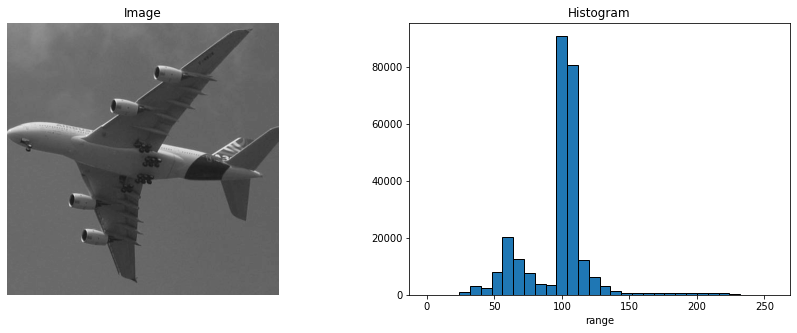

In [39]:
gray = load_image(3)
calculate_hist(gray)

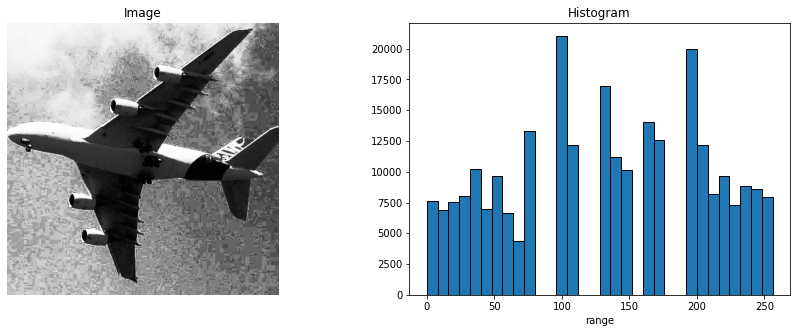

In [40]:
equalized_gray = cv2.equalizeHist(gray)
calculate_hist(equalized_gray)

### My Histogram Equalisation

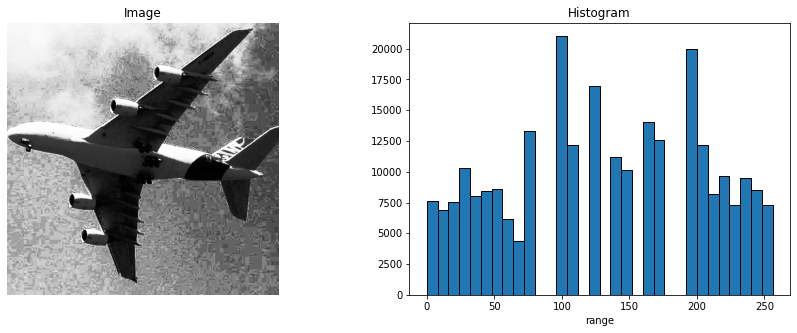

In [41]:
import numpy as np
def my_equalizing_histograms(src):
  """
  :param src: input image
  :rtype: image 
  :return dest: histogram equalized src image
  """
  dest = None
  l = 256
  hist = np.zeros(l)
  rows,cols = src.shape

  for i in range(rows):
    for j in range(cols):
      hist[src[i,j]] += 1
  total_pixels = rows*cols
  
  cumulative_hist = np.cumsum(hist)
  cumulative_hist *= (l-1)/total_pixels

  dest = cumulative_hist[src]
  return dest

dest = my_equalizing_histograms(gray)

calculate_hist(dest)

### Observation and conclusion
Here we can see the bright part of the image has brought the contrast in darkened region of images which is expected

## Histogram Matching

### Histogram Matching
Histgram matching is the proccess of modifying the contrast level of one
image based on the other image. This process involves transformation of original
image histogram based on the second image histogram. The histogram equalisation
as we have done earlier is also kind of histogram matching which involves modifying
the original image histogram similar to normal distribution

### Some inbuilt examples of histogram matching from scikit image

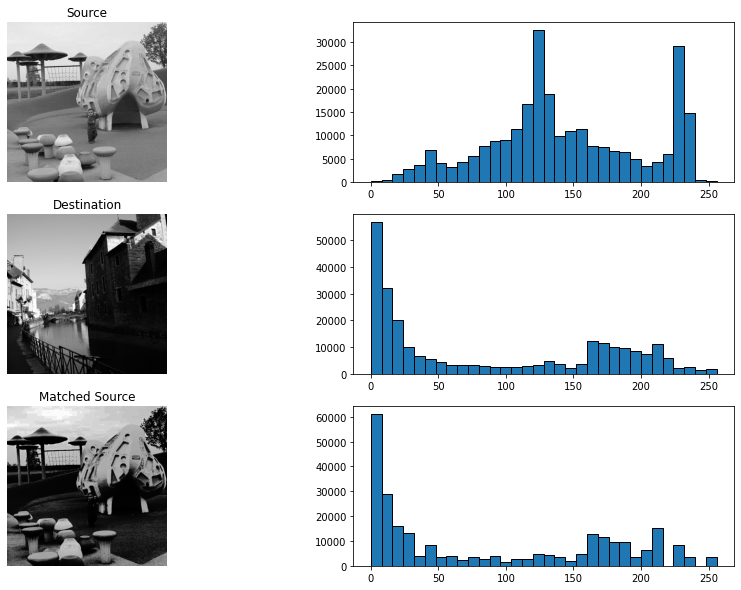

In [42]:
from skimage import exposure

src = load_image(5)
dst = load_image(6)
matched_src = exposure.match_histograms(src,dst)

compare_matched_hist(src,dst,matched_src)

### My Histogram Matching

In [43]:
def my_matching_histograms(src,dst):
  """
  :param src: input image
  :param dst: reference image
  :rtype: image 
  :return mathced_src: histogram matched src image
  """
  matched_src = None
  l = 256
  hist_src = np.zeros(l)
  hist_dst = np.zeros(l)
  rows_src, cols_src = src.shape
  rows_dst, cols_dst = dst.shape
  src_size = rows_src*cols_src
  dst_size = rows_dst*cols_dst

  for i in range(rows_src):
    for j in range(cols_src):
      hist_src[src[i,j]] += 1

  for i in range(rows_dst):
    for j in range(cols_dst):
      hist_dst[dst[i,j]] += 1

  cumulative_hist_src = np.cumsum(hist_src)
  cumulative_hist_dst = np.cumsum(hist_dst)
  
  cumulative_hist_src /= src_size
  cumulative_hist_dst /= dst_size
  pixel_intensity_map = np.empty(shape=(l),dtype=int)

  for i in range(l):
    for j in range(l):
      if(cumulative_hist_dst[j]>=cumulative_hist_src[i]):
        pixel_intensity_map[i]=j
        break
  

  matched_src = pixel_intensity_map[src]
  return matched_src

### Observation and comparisons
Here we can see that the contrast of the destination image is showing up in the source image after matching is performed

Source Image


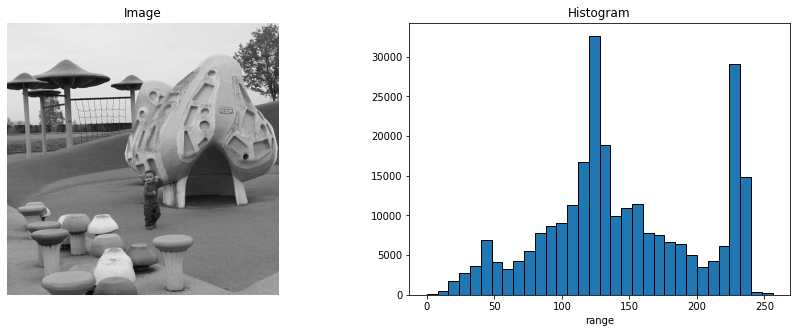

Destination Image


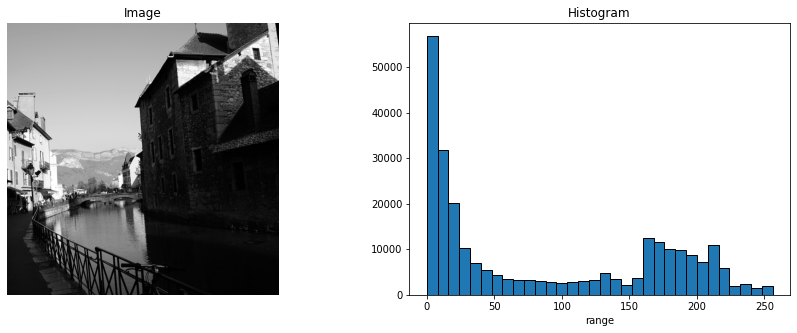

My Matched Image


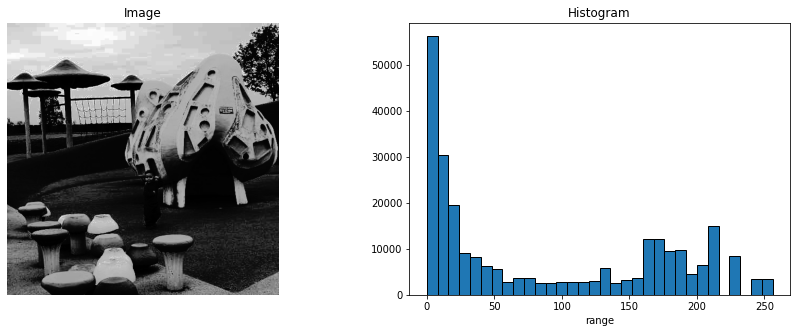

In [44]:
src = load_image(5)
dst = load_image(6)
print("Source Image")
calculate_hist(src)
print("Destination Image")
calculate_hist(dst)
matched_src_my= my_matching_histograms(src,dst)
print("My Matched Image")
calculate_hist(matched_src_my)


### Checking optimization

In [45]:
src = load_image(1)
dst = load_image(2)

In [46]:
%%timeit

my_equalizing_histograms(src)
my_matching_histograms(src,dst)

1 loop, best of 5: 485 ms per loop
